In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns, matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, LSTM, Dropout
from keras.optimizers import Adam
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [5]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
data.shape

(50000, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


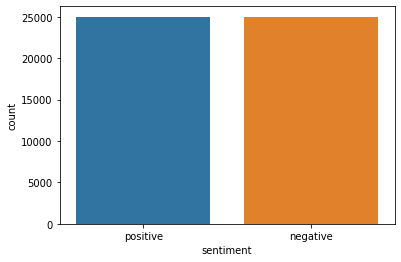

negative    25000
positive    25000
Name: sentiment, dtype: int64


In [9]:
sns.countplot(data['sentiment'])
plt.show()
print(data.sentiment.value_counts())

In [10]:
data.sentiment=[1 if sentiment=='positive' else 0 for sentiment in data.sentiment]

In [11]:
print(data.sentiment.value_counts())

1    25000
0    25000
Name: sentiment, dtype: int64


In [12]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [13]:
WPT= nltk.WordPunctTokenizer()
stop_words_list=nltk.corpus.stopwords.words('english')

In [14]:
stop_words_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
data['review'] = data['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
data['review'] = data['review'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))

data['review'] = data['review'].apply(lambda x: x.lower())

data['review'] = data['review'].apply(lambda x: x.strip())

In [16]:
data.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the ...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there s a family where a little boy ...,0
4,petter mattei s love in the time of money is a...,1
5,probably my all time favorite movie a story of...,1
6,i sure would like to see a resurrection of a u...,1
7,this show was an amazing fresh innovative id...,0
8,encouraged by the positive comments about this...,0
9,if you like original gut wrenching laughter yo...,1


In [17]:
# def token(values):
#    words = nltk.tokenize.word_tokenize(values)
#    filtered_words = [word for word in words if word not in set(stopwords.words("english"))]
#    not_stopword_doc = " ".join(filtered_words)
#    return not_stopword_doc
# data['review'] = data['review'].apply(lambda x: token(x))

In [18]:
sentiment=data.sentiment.values
sentiment

array([1, 1, 1, ..., 0, 0, 0])

In [19]:
data=data['review']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(data,sentiment,test_size=0.2)

In [21]:
print('Train set size:',x_train.shape)
print('Test set size:', x_test.shape)


Train set size: (40000,)
Test set size: (10000,)


In [22]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
tokenizer= Tokenizer(num_words=15000)
tokenizer.fit_on_texts(data)

In [23]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'it': 8,
 'in': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 's': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'movie': 17,
 'with': 18,
 'but': 19,
 'film': 20,
 'you': 21,
 'on': 22,
 't': 23,
 'not': 24,
 'he': 25,
 'are': 26,
 'his': 27,
 'have': 28,
 'be': 29,
 'one': 30,
 'at': 31,
 'all': 32,
 'they': 33,
 'by': 34,
 'an': 35,
 'who': 36,
 'so': 37,
 'from': 38,
 'like': 39,
 'there': 40,
 'or': 41,
 'just': 42,
 'her': 43,
 'about': 44,
 'out': 45,
 'if': 46,
 'has': 47,
 'what': 48,
 'some': 49,
 'good': 50,
 'can': 51,
 'more': 52,
 'when': 53,
 'very': 54,
 'she': 55,
 'up': 56,
 'no': 57,
 'time': 58,
 'my': 59,
 'even': 60,
 'would': 61,
 'only': 62,
 'which': 63,
 'really': 64,
 'story': 65,
 'see': 66,
 'their': 67,
 'had': 68,
 'me': 69,
 'were': 70,
 'we': 71,
 'well': 72,
 'than': 73,
 'much': 74,
 'get': 75,
 'been': 76,
 'bad': 77,
 'other': 78,
 'do': 79,
 'people': 80,
 'will': 81,
 'great': 82,
 'also'

In [24]:
x_train_token= tokenizer.texts_to_sequences(x_train)
x_test_token= tokenizer.texts_to_sequences(x_test)

In [25]:
x_train_token

[[16,
  821,
  4515,
  8,
  13,
  3,
  201,
  19,
  60,
  787,
  1206,
  81,
  356,
  1,
  6443,
  13,
  1140,
  3,
  54,
  400,
  467,
  4,
  34,
  1,
  250,
  752,
  10245,
  13285,
  13285,
  2,
  27,
  8047,
  3,
  179,
  4,
  11464,
  2660,
  5,
  375,
  11,
  65,
  1,
  96,
  16,
  1,
  1155,
  4,
  3647,
  778,
  7108,
  717,
  4732,
  1263,
  2,
  4,
  671,
  3575,
  899,
  3398,
  7,
  7,
  1,
  6443,
  13,
  1140,
  6,
  62,
  44,
  228,
  195,
  19,
  7010,
  9,
  731,
  4,
  1116,
  1526,
  15,
  1,
  65,
  1085,
  1,
  2487,
  4,
  107,
  38,
  67,
  341,
  5,
  3,
  5575,
  3,
  1513,
  3,
  427,
  2,
  842,
  3,
  1178,
  2551,
  40,
  26,
  107,
  1368,
  844,
  1545,
  31,
  1,
  5575,
  2368,
  34,
  3,
  6594,
  2,
  3,
  3,
  200,
  3,
  10460,
  2,
  3,
  2,
  3,
  1007,
  2265,
  31,
  1,
  427,
  63,
  643,
  18,
  1,
  14200,
  11015,
  84,
  6823,
  183,
  3968,
  7021,
  22,
  16,
  53,
  60,
  312,
  2,
  70,
  42,
  376,
  647,
  2,
  5493,
  928,
  14,
  13

In [26]:
num_tokens=[len(num) for num in x_train_token+x_test_token]
num_tokens=np.array(num_tokens)

In [27]:
num_tokens

array([382, 123, 244, ..., 300, 145, 428])

In [28]:
max_tokens=np.mean(num_tokens)+2*np.std(num_tokens)
max_tokens=int(max_tokens)
max_tokens

567

In [29]:
np.sum(num_tokens<max_tokens)/len(num_tokens)

0.94524

In [30]:
x_train_pad = pad_sequences(x_train_token, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_token, maxlen=max_tokens)

In [31]:
x_train_pad.shape

(40000, 567)

In [32]:
idx=tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))
inverse_map

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'br',
 8: 'it',
 9: 'in',
 10: 'i',
 11: 'this',
 12: 'that',
 13: 's',
 14: 'was',
 15: 'as',
 16: 'for',
 17: 'movie',
 18: 'with',
 19: 'but',
 20: 'film',
 21: 'you',
 22: 'on',
 23: 't',
 24: 'not',
 25: 'he',
 26: 'are',
 27: 'his',
 28: 'have',
 29: 'be',
 30: 'one',
 31: 'at',
 32: 'all',
 33: 'they',
 34: 'by',
 35: 'an',
 36: 'who',
 37: 'so',
 38: 'from',
 39: 'like',
 40: 'there',
 41: 'or',
 42: 'just',
 43: 'her',
 44: 'about',
 45: 'out',
 46: 'if',
 47: 'has',
 48: 'what',
 49: 'some',
 50: 'good',
 51: 'can',
 52: 'more',
 53: 'when',
 54: 'very',
 55: 'she',
 56: 'up',
 57: 'no',
 58: 'time',
 59: 'my',
 60: 'even',
 61: 'would',
 62: 'only',
 63: 'which',
 64: 'really',
 65: 'story',
 66: 'see',
 67: 'their',
 68: 'had',
 69: 'me',
 70: 'were',
 71: 'we',
 72: 'well',
 73: 'than',
 74: 'much',
 75: 'get',
 76: 'been',
 77: 'bad',
 78: 'other',
 79: 'do',
 80: 'people',
 81: 'will',
 82: 'great',
 83: 'a

In [33]:
def return_to_sentence(tokens):
  words= [inverse_map[token] for token in tokens if token!=0]
  text=' '.join(words)
  return text

In [34]:
print(return_to_sentence(x_train_pad[215]))

blythe danner and judith deliver wonderful performances here as jonathan silverman as eugene his life in s beach br br what makes the film so good is the relationships among the characters with a backdrop of extremely wonderful family values br br bob had a marvelous opportunity here as the father of the clan he gives a restrained but compelling performance as the patriarch of the family br br his sons played by jonathan silverman and brian dillinger are fabulous there are certain scenes when silverman is skating or hopping where i m reminded of jerry lewis br br as for danner and they too are wonderful their mannerisms and idealism of the jewish culture are beautifully realized by them br br the cinematography is just wonderful beautiful in even as the of war the film is rich with many of the typical problems faced by families in that period in a sense you don t have to be jewish to experience what the family is going through br br a must see for nostalgic buffs and those of us who be

In [35]:
print(x_train_pad[215])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   